# 1. Import libraries

In [1]:
import networkx as nx
import numpy as np
from sthype import SpatialGraph
from sthype.graph_functions import spatial_temporal_graph_from_spatial_graphs
from sthype.plot import plot_spatial_temporal_graph, plot_spatial_temporal_graph_node, plot_spatial_graph, plot_spatial_temporal_graph_hyperedge
import matplotlib.pyplot as plt
import os
import pickle

%load_ext autoreload
%autoreload 2

# 2. Import Graphs

In [2]:
graphs = []

str_directory = "/home/ipausers/hamzaoui/Documents/Data/Graphs/482_20230908"
directory = os.fsencode(str_directory)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    file_path = os.path.join(str_directory, filename)
    if filename.endswith('pickle'):
        graphs.append((filename, pickle.load(open(file_path, 'rb'))))

graphs.sort()
graphs = [graph for _, graph in graphs]
graphs

# 3. Spatial Graphs

In [3]:
spatial_graphs = [SpatialGraph(graph) for graph in graphs]
spatial_graph = spatial_graphs[-1]
sg = spatial_graph

# 4. Spatial Temporal Graph

## Set Up

In [4]:
spatial_temporal_graph = spatial_temporal_graph_from_spatial_graphs(spatial_graphs, np.arange(len(spatial_graphs)), verbose=1)
stg = spatial_temporal_graph

Segmentation
Edge Activation
Comparing with graph 20
Comparing with graph 19
Comparing with graph 18
Comparing with graph 17
Comparing with graph 16
Comparing with graph 15
Comparing with graph 14
Comparing with graph 13
Comparing with graph 12
Comparing with graph 11
Comparing with graph 10
Comparing with graph 9
Comparing with graph 8
Comparing with graph 7
Comparing with graph 6
Comparing with graph 5
Comparing with graph 4
Comparing with graph 3
Comparing with graph 2
Comparing with graph 1
Comparing with graph 0


## Node and Edge Attributes

In [5]:
for node, node_data in spatial_temporal_graph.nodes(data=True):
    print("Node attributes :", *node_data.keys())
    break

for node1, node2, edge_data in spatial_temporal_graph.edges(data=True):
    print("Edge attributes :", *edge_data.keys())
    break


Node attributes : position
Edge attributes : center length initial_edge initial_edge_attributes centers activation activation_timestamp 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 corrected_activation hyperedge post_hyperedge_activation


In [6]:
print(spatial_temporal_graph.get_edge_attribute_list(2186, 4196, 'width'))

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 5.4363403]


In [7]:
for node, node_data in spatial_temporal_graph.get_initial_graph().nodes(data=True):
    print("Node attributes :", *node_data.keys())
    break

for node1, node2, edge_data in spatial_temporal_graph.get_initial_graph().edges(data=True):
    print("Edge attributes :", *edge_data.keys())
    break

Node attributes : position
Edge attributes : edges time_interval center length initial_edge initial_edge_attributes centers activation activation_timestamp 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 corrected_activation hyperedge


In [8]:
print(spatial_temporal_graph.get_initial_edge_attribute_list(2186, 2245, 'width'))

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 5.4363403]


## Plot corrected activation

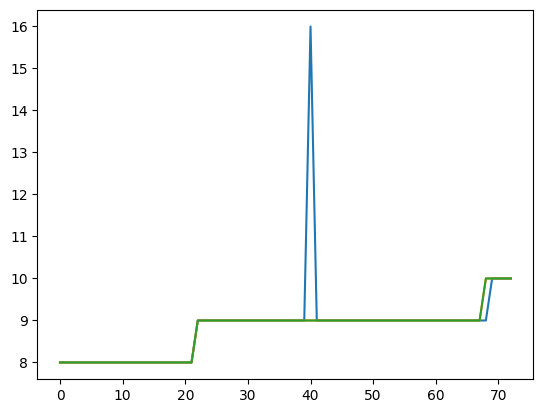

In [9]:
activations = []
corrected_activations = []
post_hyperedge_activations = []
for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(2241, 2076):
    activations.append(spatial_temporal_graph[node1][node2]['activation'])
    corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])
    post_hyperedge_activations.append(spatial_temporal_graph[node1][node2]['post_hyperedge_activation'])

plt.plot(activations)
plt.plot(corrected_activations)
plt.plot(post_hyperedge_activations);

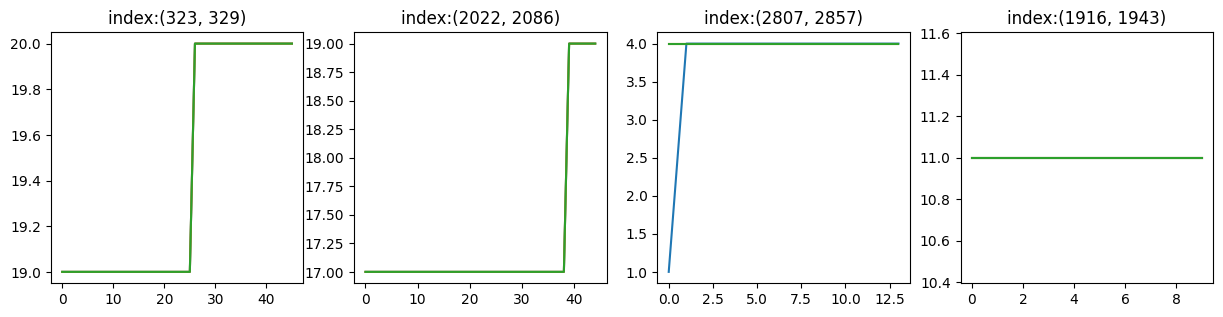

In [10]:
import random
plt.figure(figsize=(15,15))
edges = list(spatial_temporal_graph.initial_edges_edges.keys())

edges_to_plot = random.choices(edges, k=16)

for i in range(4):
    plt.subplot(4,4,i+1)
    activations = []
    corrected_activations = []
    post_hyperedge_activations = []
    for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*edges_to_plot[i]):
        activations.append(spatial_temporal_graph[node1][node2]['activation'])
        corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])
        post_hyperedge_activations.append(spatial_temporal_graph[node1][node2]['post_hyperedge_activation'])

    plt.plot(activations)
    plt.plot(corrected_activations)
    plt.plot(post_hyperedge_activations)
    plt.title(f"index:{edges_to_plot[i]}")

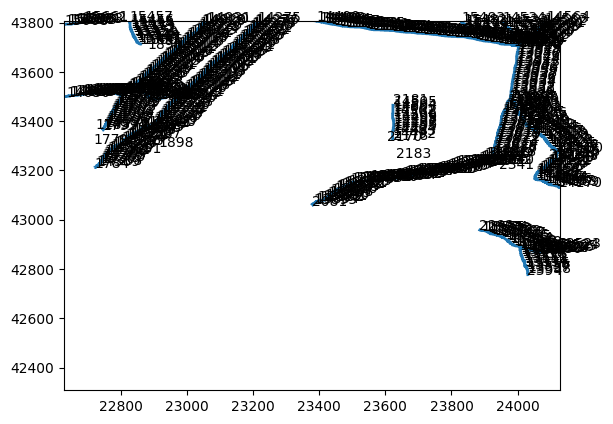

In [11]:
from sthype.plot import plot_spatial_graph_node
plot_spatial_graph_node(spatial_graphs[-1], 2081, area_size=1500, add_nodes=True);

## Plot Spatial Temporal Graph colored by activation

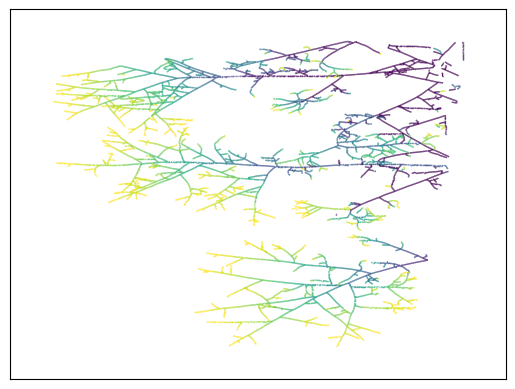

In [12]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='activation')

# 5. HyperGraph

## Plot

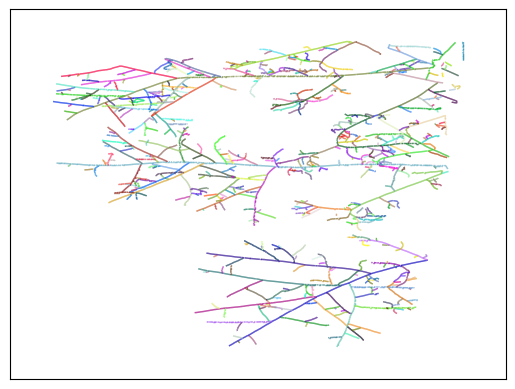

In [13]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='hyperedge')

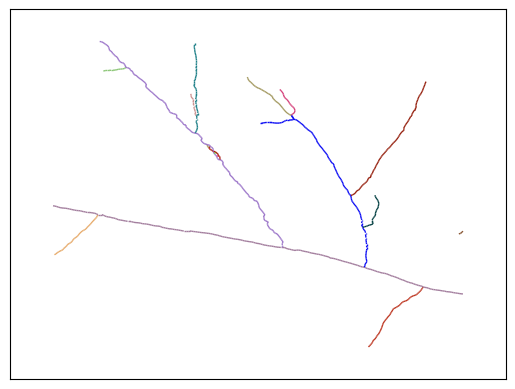

In [14]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='hyperedge', region=((21000, 40000), (23000, 42000)), time=20)

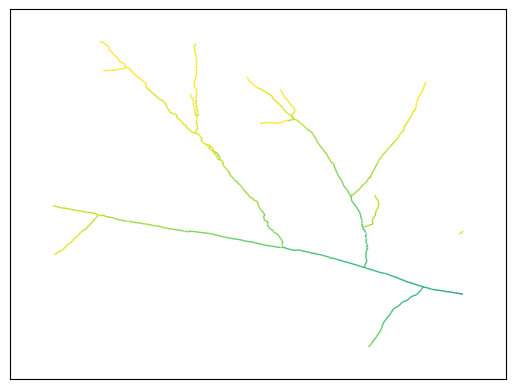

In [15]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='activation', region=((21000, 40000), (23000, 42000)), time=20)

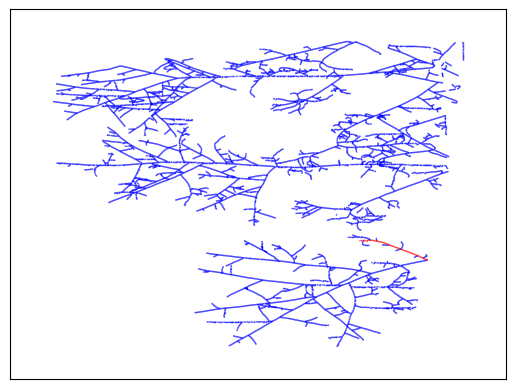

In [16]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group=5)

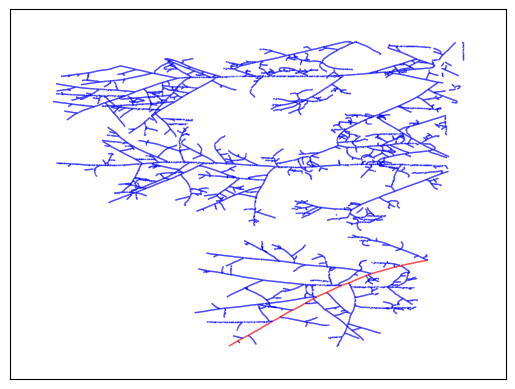

In [17]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group=565)

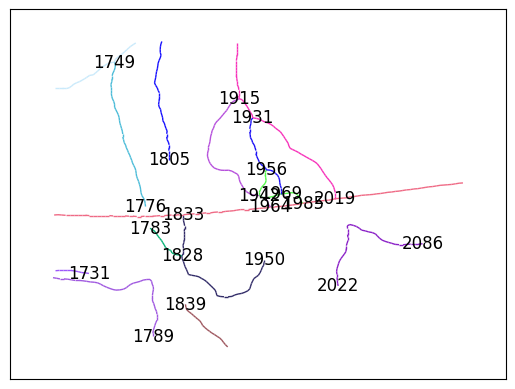

In [18]:
plot_spatial_temporal_graph_node(spatial_temporal_graph, node=1942, area_size=1000, add_nodes=False, add_initial_nodes=True, color_group='hyperedge')

## Merge Hyperedges

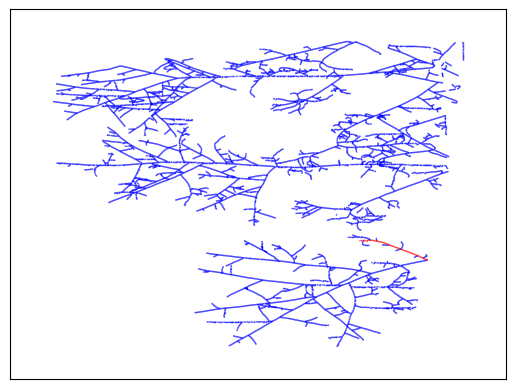

In [19]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group=5)

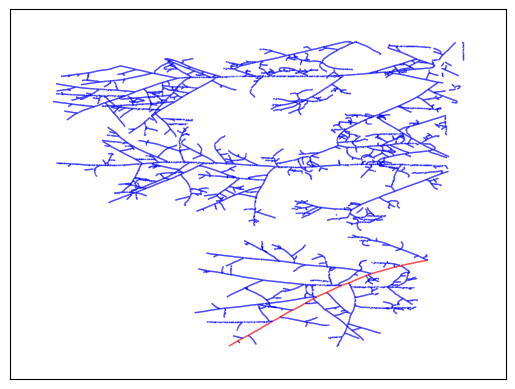

In [22]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group=565)

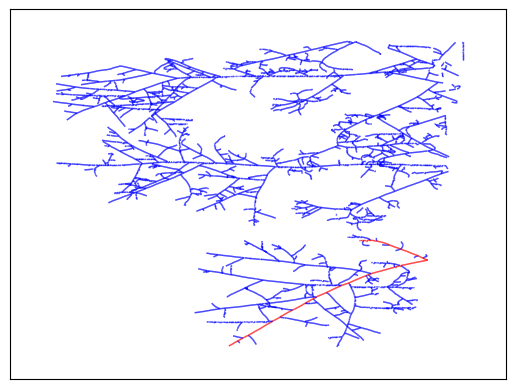

In [26]:
from sthype.graph_functions import merge_hyperedges
from copy import deepcopy
stg_copy = deepcopy(stg)

merge_hyperedges(stg_copy, 5, 565)
plot_spatial_temporal_graph(stg_copy, color_group=5)

## HyperEdge Activation Analysis

### Random HyperEdges

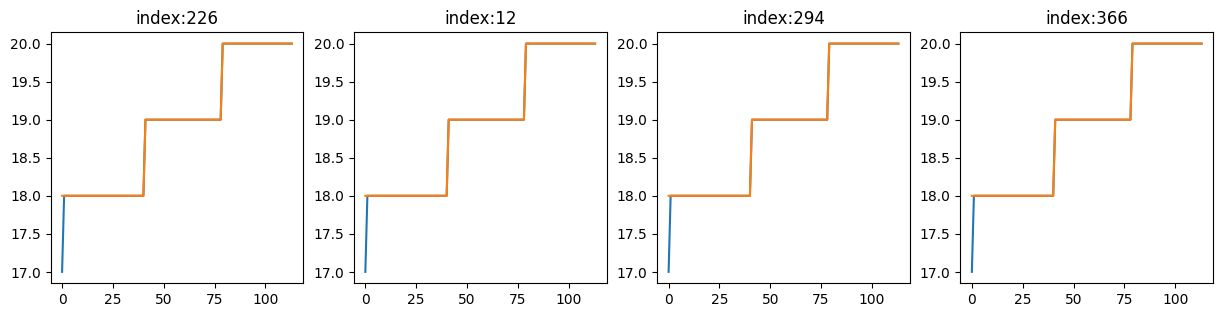

In [ ]:
import random
plt.figure(figsize=(15,15))
H = spatial_temporal_graph.get_hyperedges_initial_edges()
hyper_edges_to_plot = list(H.keys())

hyper_edges_to_plot = random.choices(hyper_edges_to_plot, k=16)

for i in range(4):
    plt.subplot(4,4,i+1)
    activations = []
    corrected_activations = []
    for inital_edge in H[4]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])

    plt.plot(activations)
    plt.plot(corrected_activations)
    plt.title(f"index:{hyper_edges_to_plot[i]}")

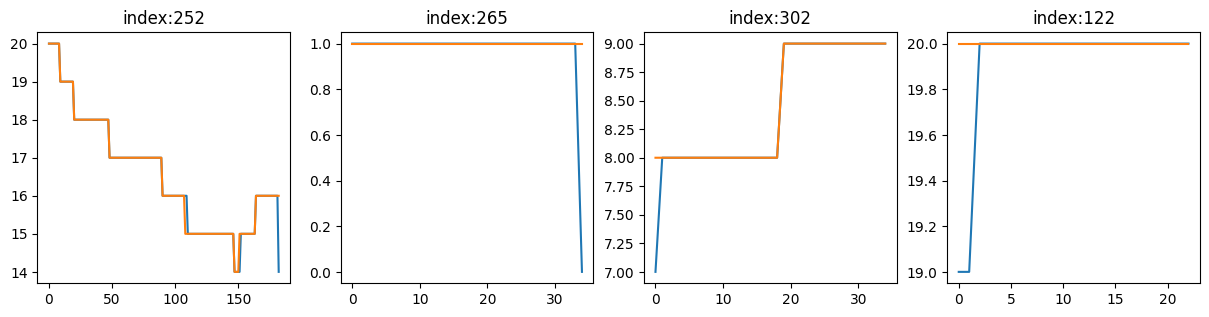

In [ ]:
import random
plt.figure(figsize=(15,15))
H = spatial_temporal_graph.get_hyperedges_initial_edges()
hyper_edges_to_plot = list(H.keys())

hyper_edges_to_plot = random.choices(hyper_edges_to_plot, k=16)

for i in range(4):
    plt.subplot(4,4,i+1)
    activations = []
    corrected_activations = []
    for inital_edge in H[hyper_edges_to_plot[i]]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])

    plt.plot(activations)
    plt.plot(corrected_activations)
    plt.title(f"index:{hyper_edges_to_plot[i]}")

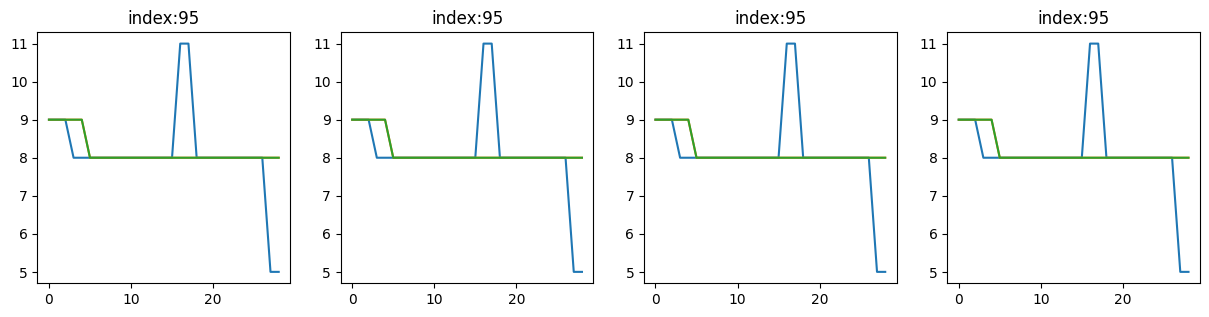

In [ ]:
from scipy.ndimage import median_filter

plt.figure(figsize=(15,15))

for i in range(4):
    plt.subplot(4,4,i+1)
    activations = []
    corrected_activations = []
    for inital_edge in H[95]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])

    plt.plot(activations)
    plt.plot(corrected_activations)
    plt.plot(median_filter(corrected_activations, 41, mode='nearest'))
    plt.title(f"index:{95}")

### Non monotonic HyperEdges

In [ ]:
from sthype.utils import is_monotonic

not_monotonic_hyperedge = []
fixable_hyperedges = []

for hyper_edge in H:
    activations = []
    corrected_activations = []
    indexes = []
    for inital_edge in H[hyper_edge]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])
        indexes.append(len(activations))

    indexes.pop()
    if not is_monotonic(np.array(corrected_activations)):
        not_monotonic_hyperedge.append(hyper_edge)
        for index in indexes:
            if is_monotonic(np.array(corrected_activations[:index])) and is_monotonic(np.array(corrected_activations[index:])):
                fixable_hyperedges.append(hyper_edge)
                break
        

print("not monotonic hyperedges:", len(not_monotonic_hyperedge))
print("fixable hyperedges:", len(fixable_hyperedges))

not monotonic hyperedges: 37
fixable hyperedges: 27


In [ ]:
[hyperedge for hyperedge in not_monotonic_hyperedge if hyperedge not in fixable_hyperedges]

[21, 27, 91, 125, 297, 313, 325, 376, 391, 492]

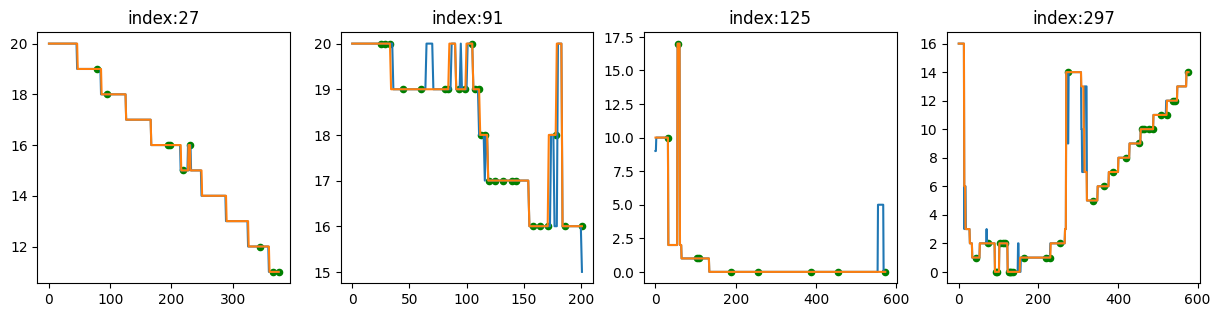

In [ ]:
plt.figure(figsize=(15,15))
H = spatial_temporal_graph.get_hyperedges_initial_edges()

for i in range(4):
    plt.subplot(4,4,i+1)
    activations = []
    corrected_activations = []
    for inital_edge in H[[27, 91, 125, 297][i]]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])
        plt.scatter(len(corrected_activations)-1, corrected_activations[-1], color='g', s=20)

    plt.plot(activations)
    plt.plot(corrected_activations)
    plt.title(f"index:{[27, 91, 125, 297][i]}")

In [ ]:
k=0

In [ ]:
k += 4
k

4

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 13, 13, 13,

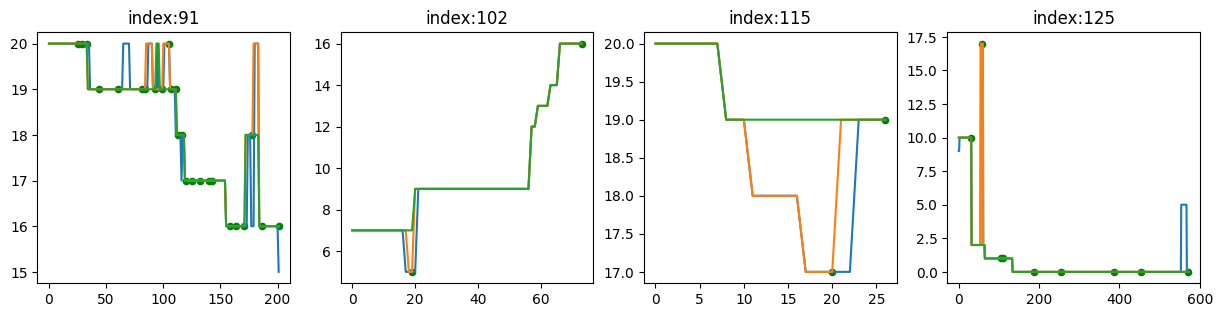

In [ ]:
plt.figure(figsize=(15,15))
H = spatial_temporal_graph.get_hyperedges_initial_edges()

hyper_edges_to_plot = random.choices(not_monotonic_hyperedge, k=16)

for i in range(4):
    plt.subplot(4,4,i+1)
    activations = []
    corrected_activations = []
    for inital_edge in H[not_monotonic_hyperedge[i+k]]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])
        plt.scatter(len(corrected_activations)-1, corrected_activations[-1], color='g', s=20)

    plt.plot(activations)
    plt.plot(corrected_activations)
    plt.plot(median_filter(corrected_activations, 21, mode="nearest"))
    print(corrected_activations)
    plt.title(f"index:{not_monotonic_hyperedge[i+k]}")


((20772.5, 39975.5), (22566.5, 42437.5))
((25085.5, 40935.0), (25379.5, 42075.0))
((23802.0, 42015.5), (24254.0, 42085.5))
((22788.5, 41950.0), (27546.5, 47258.0))


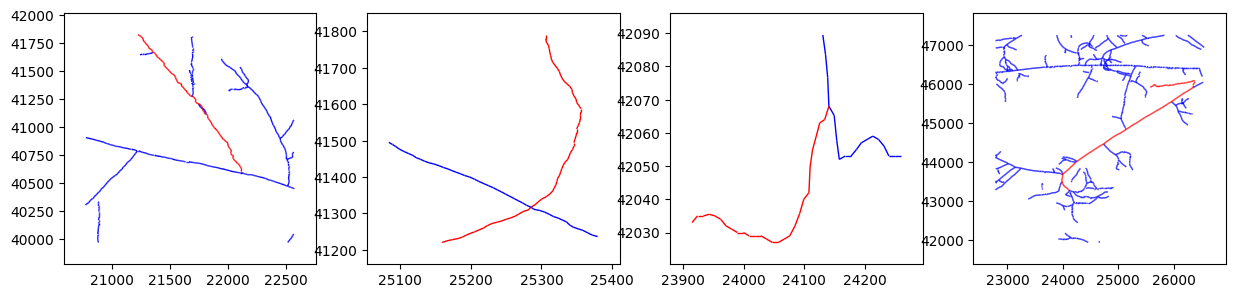

In [ ]:
plt.figure(figsize=(15,15))
for i in range(4):
    ax = plt.subplot(4,4,i+1)
    plot_spatial_temporal_graph_hyperedge(spatial_temporal_graph, hyperedge=not_monotonic_hyperedge[i+k], ax=ax, scale=2, verbose=1)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

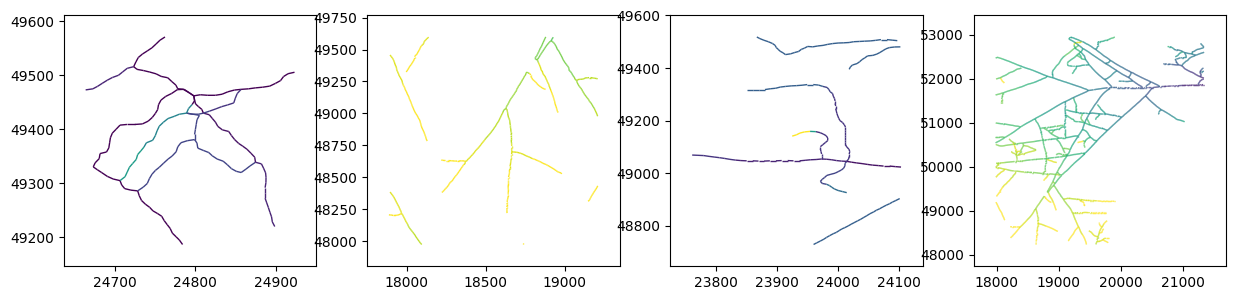

In [ ]:
regions = [
((24663.5, 49192.0), (24921.5, 49568.0)),
((17895.0, 47977.5), (19207.0, 49591.5)),
((23769.5, 48730.0), (24095.5, 49514.0)),
((17990.0, 48232.5), (21330.0, 52986.5))
]

plt.figure(figsize=(15,15))
for i in range(4):
    ax = plt.subplot(4,4,i+1)
    plot_spatial_temporal_graph(spatial_temporal_graph, color_group='activation', region=regions[i], ax=ax)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

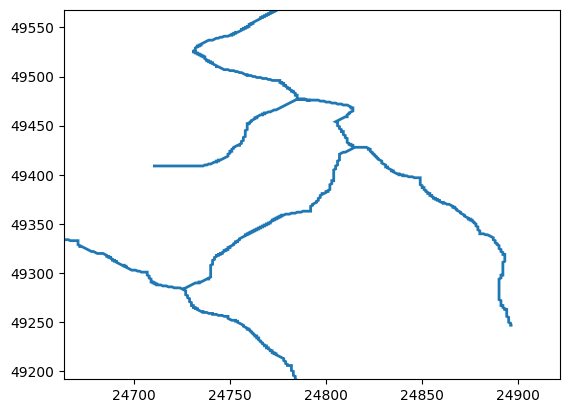

In [ ]:
plot_spatial_graph(spatial_graphs[8], region=regions[0]);

### HyperEdges with big jump

In [ ]:
big_jump_matching_hyperedge = set()

for hyper_edge in H:
    corrected_activations = []
    for inital_edge in H[hyper_edge]:
        test = True
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            if test:
                test=False
                if corrected_activations and np.abs(corrected_activations[-1] - spatial_temporal_graph[node1][node2]['corrected_activation']) >= 2:
                    big_jump_matching_hyperedge.add(hyper_edge)
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])

big_jump_matching_hyperedge = list(big_jump_matching_hyperedge)
len(big_jump_matching_hyperedge)

48

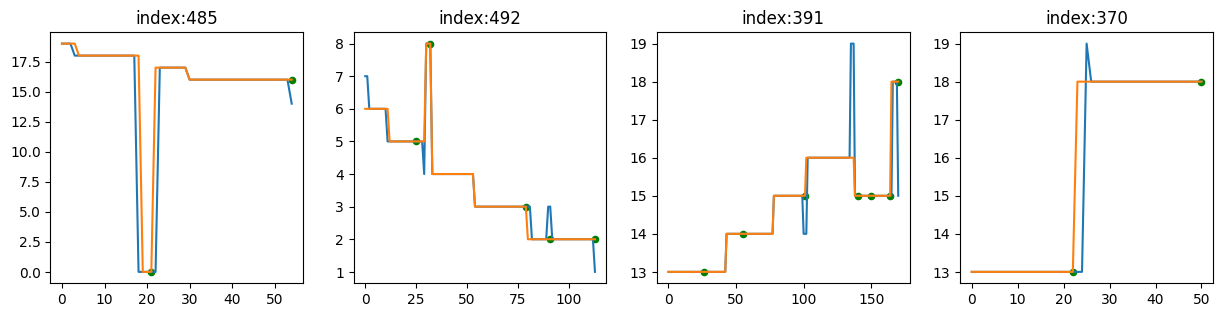

In [ ]:
plt.figure(figsize=(15,15))
H = spatial_temporal_graph.get_hyperedges_initial_edges()

hyper_edges_to_plot = random.choices(big_jump_matching_hyperedge, k=16)

for i in range(4):
    plt.subplot(4,4,i+1)
    activations = []
    corrected_activations = []
    for inital_edge in H[hyper_edges_to_plot[i]]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])
        plt.scatter(len(corrected_activations)-1, corrected_activations[-1], color='g', s=20)

    plt.plot(activations)
    plt.plot(corrected_activations)
    plt.title(f"index:{hyper_edges_to_plot[i]}")

### Hyperedges with big jump after median filter

In [ ]:
from sthype.utils import is_monotonic
from scipy.ndimage import median_filter

not_monotonic_hyperedge = []

for hyper_edge in H:
    activations = []
    corrected_activations = []
    for inital_edge in H[hyper_edge]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])

    if not is_monotonic(median_filter(corrected_activations, 21, mode='nearest')):
        not_monotonic_hyperedge.append(hyper_edge)

len(not_monotonic_hyperedge)

18

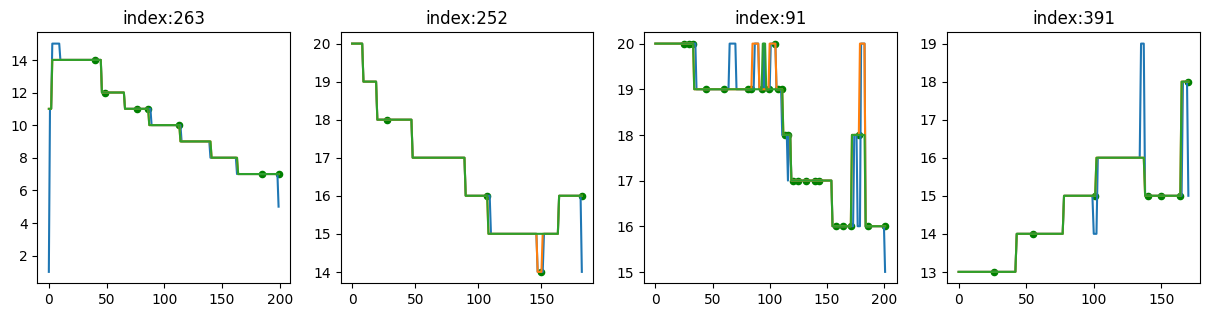

In [ ]:
plt.figure(figsize=(15,15))
H = spatial_temporal_graph.get_hyperedges_initial_edges()

hyper_edges_to_plot = random.choices(not_monotonic_hyperedge, k=16)

for i in range(4):
    plt.subplot(4,4,i+1)
    activations = []
    corrected_activations = []
    for inital_edge in H[hyper_edges_to_plot[i]]:
        for node1, node2 in spatial_temporal_graph.get_initial_edge_edges(*inital_edge):
            activations.append(spatial_temporal_graph[node1][node2]['activation'])
            corrected_activations.append(spatial_temporal_graph[node1][node2]['corrected_activation'])
        plt.scatter(len(corrected_activations)-1, corrected_activations[-1], color='g', s=20)

    plt.plot(activations)
    plt.plot(corrected_activations)
    plt.plot(median_filter(corrected_activations, 21, mode='nearest'))
    plt.title(f"index:{hyper_edges_to_plot[i]}")

# 6. WIP

## Shapely test simplify

In [ ]:
from shapely import LineString, MultiLineString, transform
print(LineString([(0, 0), (0, 5), (0, 7),(0, 10)]).segmentize(max_segment_length=4))

LINESTRING (0 0, 0 2.5, 0 5, 0 7, 0 10)


633


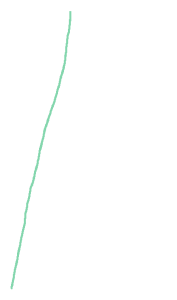

In [ ]:
pixels = spatial_graphs[-1][2186][2245]['pixels']
print(len(pixels))
line = LineString(pixels)
LineString(pixels)

In [ ]:
print(line.length)
print(line.simplify(1).length)

674.2497833620566
622.3430535749736


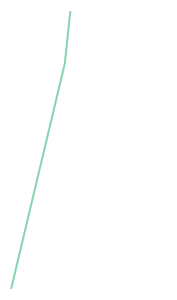

In [ ]:
line.simplify(10)

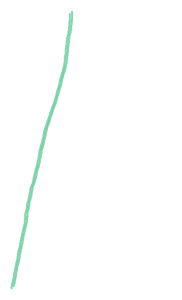

In [ ]:
mline = MultiLineString([line, transform(line, lambda x: x+5)])
mline

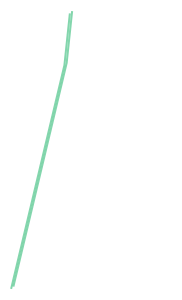

In [ ]:
mline.simplify(10, preserve_topology=False)

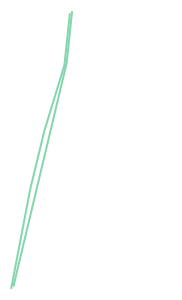

In [ ]:
mline.simplify(10, preserve_topology=True)

In [ ]:
print(mline)
print(mline.simplify(10, preserve_topology=False))
print(mline.simplify(10))

MULTILINESTRING ((23636 35345, 23637 35346, 23637 35347, 23637 35348, 23637 35349, 23637 35350, 23638 35351, 23638 35352, 23638 35353, 23638 35354, 23639 35354, 23639 35355, 23639 35356, 23639 35357, 23639 35358, 23639 35359, 23640 35360, 23640 35361, 23640 35362, 23640 35363, 23640 35364, 23641 35365, 23641 35366, 23641 35367, 23641 35368, 23642 35369, 23642 35370, 23642 35371, 23642 35372, 23642 35373, 23642 35374, 23642 35375, 23642 35376, 23643 35377, 23643 35378, 23643 35379, 23643 35380, 23643 35381, 23644 35382, 23644 35383, 23644 35384, 23644 35385, 23644 35386, 23644 35387, 23645 35388, 23645 35389, 23645 35390, 23645 35391, 23646 35392, 23646 35393, 23646 35394, 23646 35395, 23647 35396, 23647 35397, 23647 35398, 23647 35399, 23647 35400, 23648 35400, 23648 35401, 23648 35402, 23648 35403, 23648 35404, 23649 35404, 23649 35405, 23649 35406, 23649 35407, 23649 35408, 23650 35409, 23650 35410, 23650 35411, 23650 35412, 23650 35413, 23650 35414, 23650 35415, 23651 35416, 23651 3

## Look small edges

In [ ]:
for edge in spatial_graphs[-1].edges:
    if (spatial_graphs[-1].edge_pixels(*edge).length) < 10:
        print(edge, (spatial_graphs[-1].edge_pixels(*edge).length))

(1617, 1615) 8.0
(1564, 1562) 6.414213562373095
(1555, 1554) 1.0
(1555, 1553) 1.0
(1562, 1556) 8.242640687119284
(1562, 1565) 3.82842712474619
(1556, 1559) 3.414213562373095
(1556, 1557) 2.0
(1559, 1557) 2.0
(1557, 1554) 5.414213562373095
(1554, 1553) 2.0
(3189, 3187) 2.0
(3189, 3190) 2.0
(3187, 3190) 3.414213562373095
(1505, 1503) 2.0
(1505, 1506) 2.0
(1503, 1506) 3.414213562373095
(1445, 1447) 9.485281374238571
(1419, 1416) 6.82842712474619
(1419, 1425) 6.242640687119286
(1430, 1425) 4.414213562373095
(1416, 1415) 7.414213562373095
(1416, 1420) 5.242640687119285
(1425, 1422) 5.414213562373095
(1422, 1420) 1.0
(1422, 1423) 1.0
(1415, 1421) 7.414213562373095
(1420, 1421) 1.0
(1423, 1421) 1.0
(1400, 1397) 3.0
(1381, 1384) 4.414213562373095
(1381, 1380) 9.65685424949238
(1384, 1383) 7.414213562373095
(1380, 1383) 4.414213562373095
(1363, 1367) 6.656854249492381
(1370, 1367) 3.8284271247461903
(1361, 1362) 4.414213562373095
(1367, 1364) 8.414213562373096
(1364, 1362) 4.414213562373095
(13

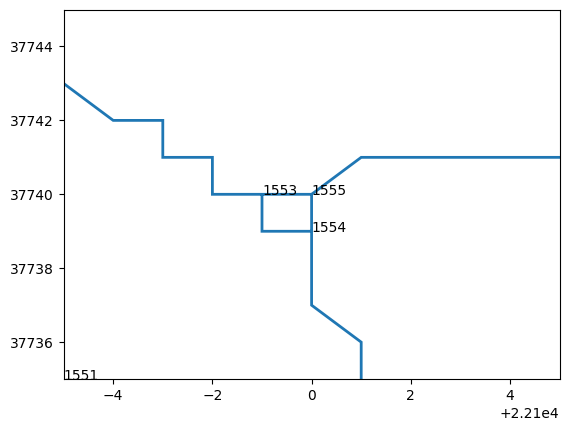

In [ ]:
from sthype.plot.plot_spatial_graph import plot_spatial_graph_node

plot_spatial_graph_node(spatial_graphs[-1], 1555, area_size=10, add_nodes=True)

## Tests

In [ ]:
g = nx.Graph()
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(1,5)
g.add_edge(6,5, test='test')
g.add_edge(7,6)
g.add_edge(3,6)
g.add_node(9)
gc = nx.contracted_nodes(g, 3, 6, self_loops=False)
print(list(gc.edges))
gc[3][5][1] = 0
print(gc[3][5])

[(1, 2), (1, 5), (2, 3), (3, 4), (3, 5), (3, 7)]
{'test': 'test', 1: 0}


In [ ]:
g = nx.Graph()
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(2,3)
g.add_edge(4,2)
g.add_edge(4,3)
g.add_edge(1,6)
g.add_edge(4,5)
g.add_node(7)

nx.contracted_nodes(g, 7, 3, self_loops=False, copy=False)
nx.contracted_nodes(g, 7, 2, self_loops=False, copy=False)

for e in g.edges:
    print(e)

(1, 6)
(1, 7)
(4, 5)
(4, 7)


In [ ]:
g = nx.Graph()
g.add_edge(1,2, u=1)
g.add_edge(1,3, u=2)
g.add_edge(1,4, u=3)
g.add_edge(2,3)
g.add_node(7)

nx.contracted_nodes(g, 7, 2, self_loops=False, copy=False)
nx.contracted_nodes(g, 7, 3, self_loops=False, copy=False)
nx.contracted_nodes(g, 7, 4, self_loops=False, copy=False)


for e in g.edges(data=True):
    print(e)

(1, 7, {'u': 1, 'contraction': {(3, 1): {'u': 2}, (4, 1): {'u': 3}}})


In [ ]:
g = nx.DiGraph()
g.add_node(1, p=1)
g.add_node(2, p=2)
g.add_node(3, p=3)
g.add_edge(1,2, u=1)
g.add_edge(2,1, u=-1)
g.add_edge(1,3, u=2)
g.add_edge(3,1, u=-2)
g.add_edge(2,3)
g.add_node(7, p=7)

nx.contracted_nodes(g, 7, 2, self_loops=False, copy=False)
nx.contracted_nodes(g, 7, 3, self_loops=False, copy=False)


for e in g.edges(data=True):
    print(e)

(1, 7, {'u': 1, 'contraction': {(1, 3): {'u': 2}}})
(7, 1, {'u': -1, 'contraction': {(3, 1): {'u': -2}}})


In [ ]:
nx.get_node_attributes(g, 'p')

{1: 1, 7: 7}

In [ ]:
d = {1:1, 3:3}
d.update({1:2, 2:3})
d

{1: 2, 3: 3, 2: 3}

## Plot

### Hyperedge 453

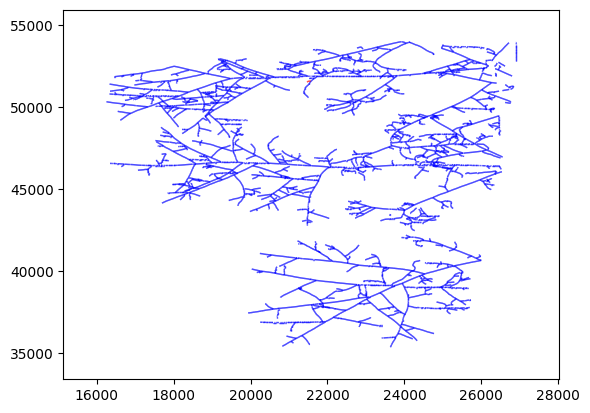

In [ ]:
fig, ax = plt.subplots()
plot_spatial_temporal_graph(spatial_temporal_graph, color_group=453, ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

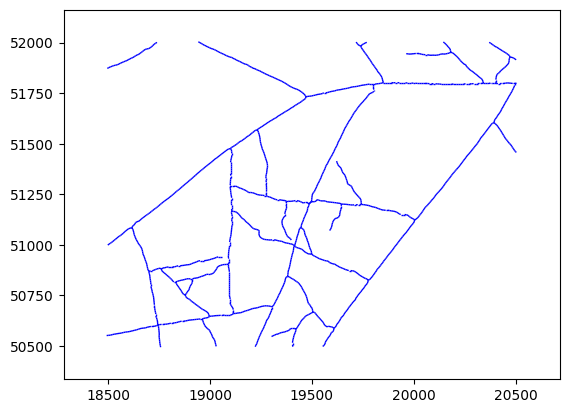

In [ ]:
fig, ax = plt.subplots()
plot_spatial_temporal_graph(spatial_temporal_graph, color_group=453, ax=ax, region=[[18500, 50500], [20500, 52000]])
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

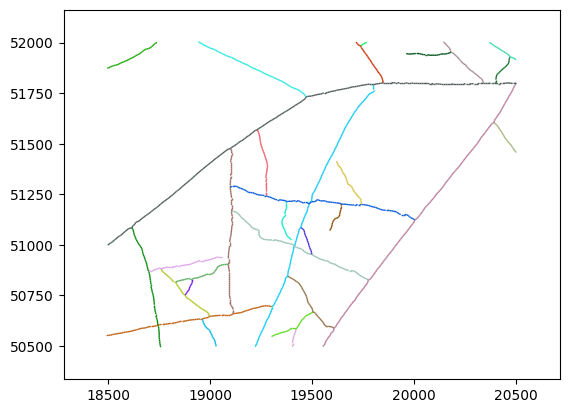

In [ ]:
fig, ax = plt.subplots()
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='hyperedge', ax=ax, region=[[18500, 50500], [20500, 52000]])
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

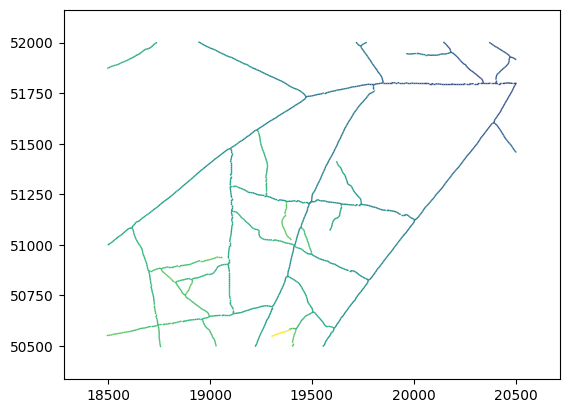

In [ ]:
fig, ax = plt.subplots()
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='activation', ax=ax, region=[[18500, 50500], [20500, 52000]])
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

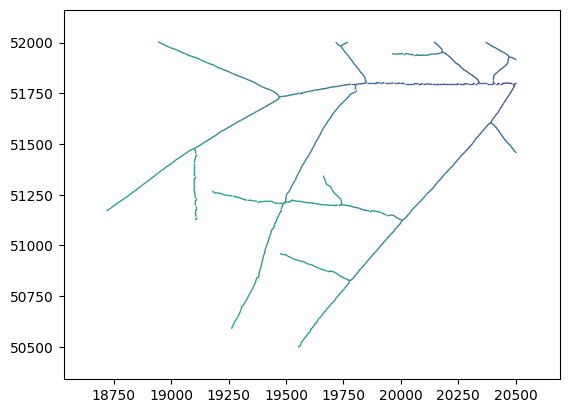

In [ ]:
fig, ax = plt.subplots()
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='activation', ax=ax, region=[[18500, 50500], [20500, 52000]], time=11)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

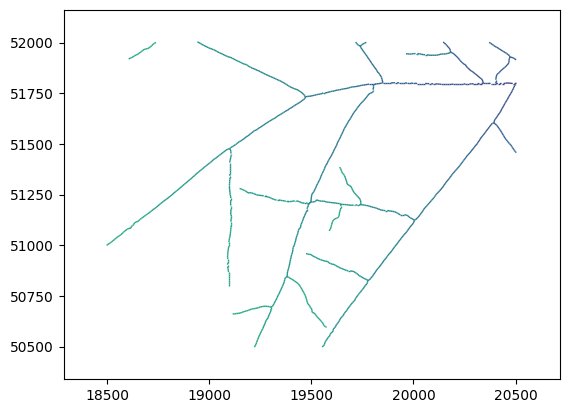

In [ ]:
fig, ax = plt.subplots()
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='activation', ax=ax, region=[[18500, 50500], [20500, 52000]], time=12)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

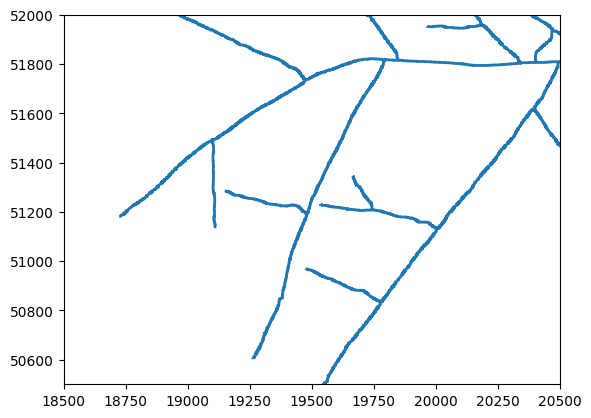

In [ ]:
plot_spatial_graph(spatial_graphs[11], region=[[18500, 50500], [20500, 52000]]);

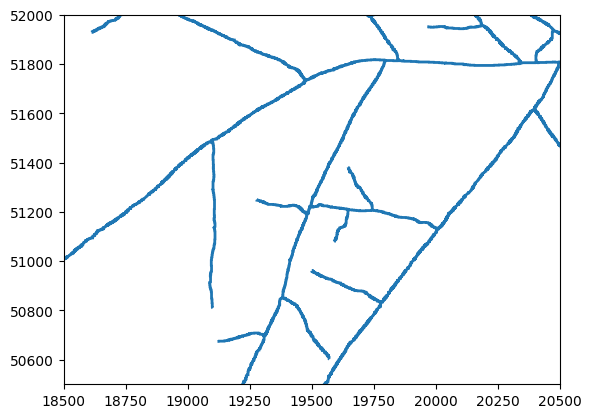

In [ ]:
plot_spatial_graph(spatial_graphs[12], region=[[18500, 50500], [20500, 52000]]);

### HyperEdge under edge 453

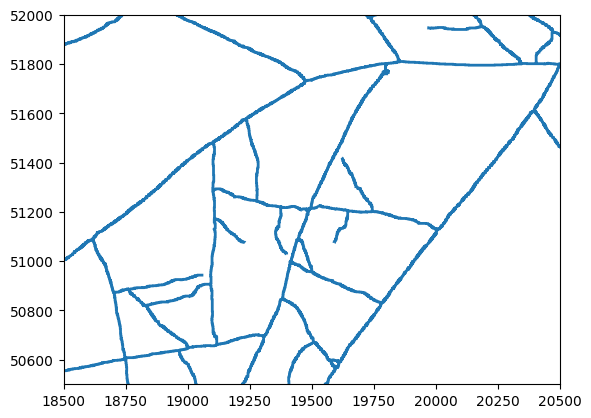

In [ ]:
plot_spatial_graph(spatial_graphs[16], region=[[18500, 50500], [20500, 52000]]);

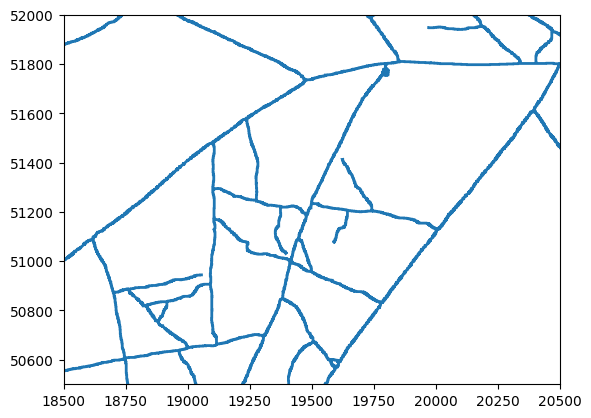

In [ ]:
plot_spatial_graph(spatial_graphs[17], region=[[18500, 50500], [20500, 52000]]);

## Loop Analysis

In [ ]:
from sthype.classes import SpatialTemporalGraph
from shapely import MultiPoint, Point

def cycle_width(stg: SpatialTemporalGraph, nodes):
    points = MultiPoint([stg.positions[node] for node in nodes])
    box = points.minimum_rotated_rectangle
    x, y = box.exterior.coords.xy
    edges_length = (Point(x[0], y[0]).distance(Point(x[1], y[1])), Point(x[1], y[1]).distance(Point(x[2], y[2])))
    return min(edges_length)

In [ ]:
from networkx import simple_cycles

for cycle in simple_cycles(spatial_temporal_graph, 20):
    width = cycle_width(spatial_temporal_graph, cycle)
    if (width) < 10:
        print(len(cycle), width, cycle)

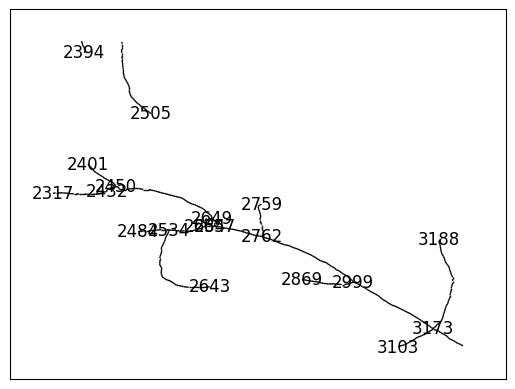

In [ ]:
plot_spatial_temporal_graph_node(spatial_temporal_graph, 13259, area_size=2000, add_initial_nodes=True)

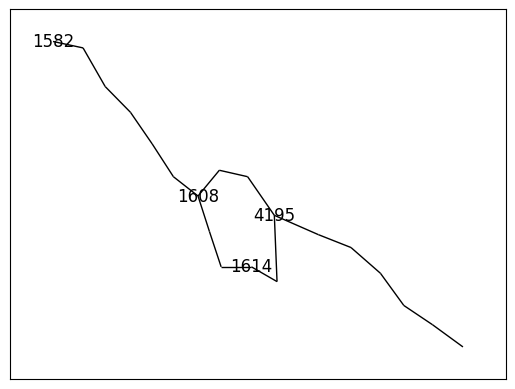

In [ ]:
plot_spatial_temporal_graph_node(spatial_temporal_graph, 1614, area_size=100, add_initial_nodes=True)

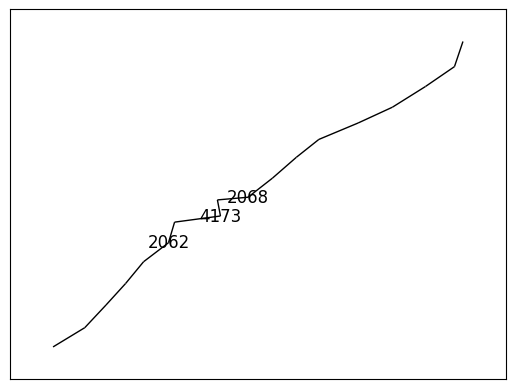

In [ ]:
plot_spatial_temporal_graph_node(spatial_temporal_graph, 2068, add_initial_nodes=True)

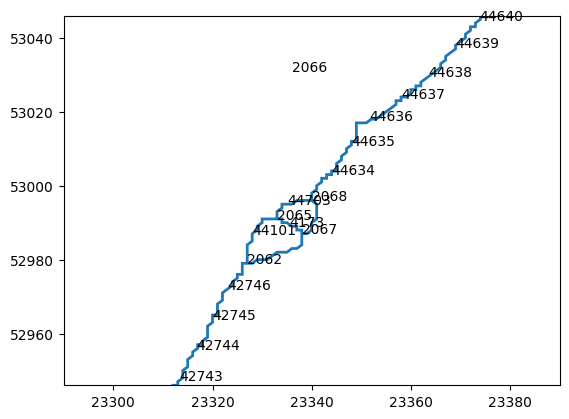

In [ ]:
plot_spatial_graph_node(spatial_graph, 2068, add_nodes=True)

In [ ]:
for n in spatial_graph[2068]:
    print(n)

2065
2067
2203


In [ ]:
spatial_temporal_graph.initial_graph[2068][4173]

{'edges': [(2068, 44703), (44703, 4173)],
 'time_interval': (3, 3),
 'center': <POINT (23333.5 52993.5)>,
 'length': 5.414213562373095,
 'initial_edge': {2068, 4173},
 'initial_edge_attributes': {'weight': 11,
  'width': 0,
  'contraction': {(2068,
    2067): {'pixels': <LINESTRING (23340 52996, 23341 52995, 23341 52994, 23341 52993, 23341 52992...>, 'weight': 11, 'width': 0}}},
 'centers': [<POINT (23334.514 52992.081)>,
  <POINT (23333.012 52993.384)>,
  <POINT (23332.88 52993.505)>,
  <POINT (23332.696 52993.661)>,
  <POINT (23331.465 52994.522)>,
  <POINT (23331.248 52994.671)>,
  <POINT (23331.426 52994.551)>,
  <POINT (23331.79 52994.311)>,
  <POINT (23331.935 52994.224)>,
  <POINT (23333.134 52993.491)>,
  <POINT (23333.134 52993.491)>,
  <POINT (23336.555 52991.489)>,
  <POINT (23335.588 52992.051)>,
  <POINT (23336.841 52991.285)>,
  <POINT (23336.841 52991.285)>,
  <POINT (23336.841 52991.285)>,
  <POINT (23338.252 52990.403)>,
  <POINT (23337.022 52991.16)>,
  <POINT (23337.

In [ ]:
print(stg.get_hyperedge_edges(5))

[(3470, 11731), (11731, 11732), (11732, 11733), (11733, 11734), (11734, 11735), (11735, 11736), (11736, 11737), (11737, 11738), (11738, 11739), (11739, 11740), (11740, 11741), (11741, 11742), (11742, 11743), (11743, 11744), (11744, 11745), (11745, 11746), (11746, 11747), (11747, 11748), (11748, 11749), (11749, 11750), (11750, 11751), (11751, 11752), (11752, 3443), (3443, 12444), (12444, 12445), (12445, 12446), (12446, 12447), (12447, 12448), (12448, 12449), (12449, 12450), (12450, 12451), (12451, 12452), (12452, 12453), (12453, 12454), (12454, 12455), (12455, 12456), (12456, 12457), (12457, 12458), (12458, 12459), (12459, 12460), (12460, 12461), (12461, 12462), (12462, 12463), (12463, 12464), (12464, 3423), (3423, 12590), (12590, 12591), (12591, 12592), (12592, 12593), (12593, 12594), (12594, 12595), (12595, 12596), (12596, 12597), (12597, 12598), (12598, 12599), (12599, 12600), (12600, 12601), (12601, 12602), (12602, 12603), (12603, 12604), (12604, 12605), (12605, 12606), (12606, 1260

## Shapely minimum_rotated_rectangle

In [ ]:
from shapely import MultiPoint

In [ ]:
mp = MultiPoint([[0,0], [2,2], [1,2], [-1, 1], [0,2.1] ])
print(mp.minimum_rotated_rectangle)

POLYGON ((2 2, 0 0, -1.05 1.05, 0.95 3.05, 2 2))


## DiGraph

In [ ]:
stg._directed_graph_gathered=False
dg = stg.get_directed_graph()

In [ ]:
def in_region(
    point: Point,
    region: tuple[tuple[float, float], tuple[float, float]],
) -> bool:
    return (
        region[0][0] < point.x
        and point.x < region[1][0]
        and region[0][1] < point.y
        and point.y < region[1][1]
    )

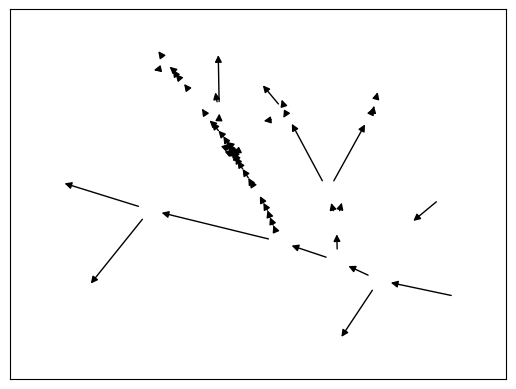

In [ ]:
from networkx import draw_networkx
region=((21000, 40000), (23000, 42000))

edgelist=[]
for node1, node2 in dg.edges:
    if in_region(stg.positions[node1], region) or in_region(stg.positions[node2], region):
        edgelist.append((node1, node2))

pos = {node: (point.x, point.y) for node, point in stg.positions.items()}

draw_networkx(dg, pos, with_labels=False, nodelist=[], edgelist=edgelist)

In [ ]:
nodeset_begin = set()
nodeset_end = set()
for node1, node2 in dg.edges:
    if dg.degree[node1]<=2 and pos[node1][0] > pos[node2][0] and pos[node1][0]>25500:
        nodeset_begin.add(node1)
    if dg.degree[node2]==1:
        nodeset_end.add(node2)

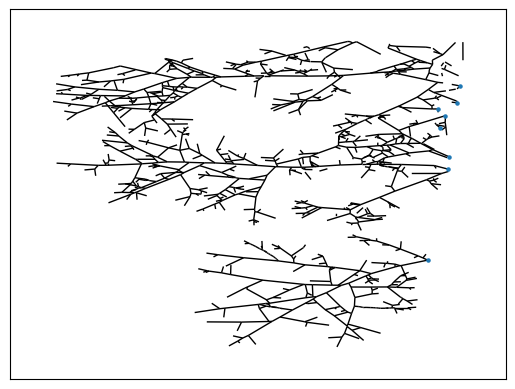

In [ ]:
nodelist = list(nodeset_begin)
draw_networkx(dg, pos, with_labels=False, nodelist=nodelist, arrows=False, node_size=5)

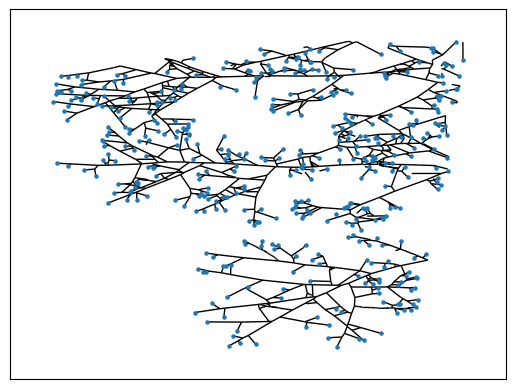

In [ ]:
nodelist = list(nodeset_end)
draw_networkx(dg, pos, with_labels=False, nodelist=nodelist, arrows=False, node_size=5)

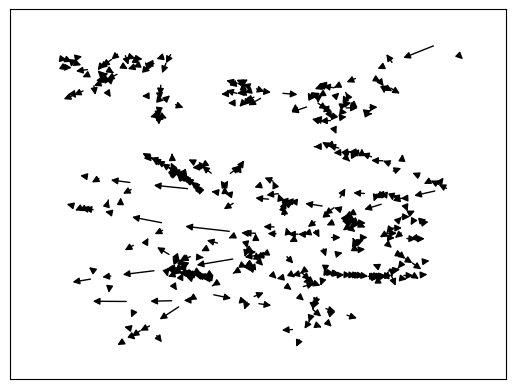

In [ ]:
from networkx import draw_networkx
region=((20000, 35000), (27000, 45000))

edgelist=[]
for node1, node2 in dg.edges:
    if in_region(stg.positions[node1], region) or in_region(stg.positions[node2], region):
        edgelist.append((node1, node2))

pos = {node: (point.x, point.y) for node, point in stg.positions.items()}

draw_networkx(dg, pos, with_labels=False, nodelist=[], edgelist=edgelist)

## Graph at time t

In [ ]:
g20 = stg.get_graph_at(20)

In [ ]:
for node, node_data in g20.nodes(data=True):
    print("Node attributes :", *node_data.keys())
    break

for node1, node2, edge_data in g20.edges(data=True):
    print("Edge attributes :", *edge_data.keys())
    print("attributes :", edge_data['attributes'])
    break


Node attributes : position
Edge attributes : pixels activation hyperedge attributes
attributes : {'weight': [633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633, 633], 'width': [5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403, 5.4363403]}
